<a href="https://colab.research.google.com/github/michaelwnau/ai_academy_notebooks/blob/main/WKS10_tues_nau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 10: SVMs and Hyperparameter Tuning

In this lab, you'll be working with Support Vector Machines.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0) Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
random_state = 42

In [8]:
from sklearn.model_selection import train_test_split

## 1) Loading the Data

First, load the data `svm_data_2020.csv`.

In [9]:
df = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/10- Week 10/WKS10 Student/data/svm_data_2020.csv')

In [10]:
df["Class"].value_counts()

0    83
1    73
Name: Class, dtype: int64

## 2) Splitting the Data (Group)

Now, split the data into a training and test set. 75% of the data should be in the training set, and 25% should be in the testing set.

Report the number of positive and negative samples in both training and testing data.

In [11]:
# Split data
# Splitting the data
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [13]:
# Report positive and negative samples
# Reporting the number of positive and negative samples in both training and testing data
print("Training data:")
print(y_train.value_counts())

print("\nTesting data:")
print(y_test.value_counts())

Training data:
0    65
1    52
Name: Class, dtype: int64

Testing data:
1    21
0    18
Name: Class, dtype: int64


## 3) Training the Model

Now, you will use sklearns [support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to fit a model to this data.

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 3.1 Fitting the Model and Getting the Support Vectors (Group)

Fit the SVC to your split data (using the default hyperparams), and report back the number of support vectors. Use `clf.support_vectors_`, which returns a list of the actual support vectors.

In [34]:
from sklearn import svm
# Create model and get the number of support vectors
# Create a SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
# Train the classifier with your data
clf.fit(X_train, y_train)
# Get the support vectors
support_vectors = clf.support_vectors_
# Print the number of support vectors
print('Number of support vectors: ', len(support_vectors))

Number of support vectors:  80


### 3.2 C hyperparameter vs Support Vector Count (Group)

*C* is the regularization hyperparameter in SVMs, and in this problem you'll be looking at how changing *C* affects the number of support vectors.

Implement the function `plot_support_vectors` below, which will plot a line chart of the number of support vectors vs. the value of *C*.

**Before implementing the function, predict the answer the following questions**
1. As C increases, how will the number of support vectors change?
2. Why?

In [30]:
"""
Input:
    params: A list of floats, representing the value of C's to try

Output:
    None
    Print a line chart of the number of support vectors vs. C

Function:
    iterate through params
        create an SVC classifier for each c
        find the length of the support vectors and append to a list

    create a plot with c on the X axis and length of support vectors on Y
"""

def plot_support_vectors(params):
    return None

In [36]:

# SOLUTIONS
Y = df["Class"]
X = df.drop("Class",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=random_state)
len(X_train)
y_train.value_counts()
y_test.value_counts()

display(X_train)
clf = SVC(C=100)
clf.fit(X_train, y_train)
print(len(clf.support_vectors_))
print(len(clf.support_vectors_[0]))
print(clf.support_vectors_)
print(clf.n_support_)

print(clf.support_)

def plot_support_vectors(params):
    svs = []

    # SOLUTION
    for c in params:
        clf=SVC(C=c)
        clf.fit(X_train,y_train)
        svs.append(len(clf.support_vectors_))

    plt.plot(params,svs,'bo--')
    plt.xlabel('C')
    plt.ylabel('Number of Support Vectors')
    plt.title('C and Its Effect on Number of Support Vectors')
    plt.show()
    # END SOLUTION
    return None

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60
26,0.029,0.064,0.039,0.017,0.048,0.082,0.396,0.032,0.074,0.086,...,0.017,0.004,0.005,0.008,0.008,0.008,0.010,0.016,0.010,0.001
134,0.013,0.007,0.031,0.031,0.008,0.077,0.308,0.064,0.073,0.090,...,0.011,0.006,0.003,0.004,0.008,0.004,0.005,0.001,0.005,0.002
79,0.037,0.059,0.063,0.053,0.026,0.142,0.828,0.273,0.307,0.260,...,0.035,0.012,0.006,0.024,0.003,0.009,0.012,0.011,0.010,0.013
131,0.053,0.088,0.200,0.260,0.322,0.225,0.248,0.229,0.095,0.074,...,0.030,0.024,0.020,0.026,0.008,0.015,0.017,0.015,0.013,0.006
36,0.097,0.082,0.063,0.061,0.062,0.121,0.376,0.422,0.574,0.502,...,0.021,0.007,0.008,0.030,0.019,0.021,0.013,0.020,0.021,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.020,0.010,0.032,0.024,0.081,0.153,0.460,0.061,0.132,0.137,...,0.019,0.013,0.008,0.007,0.004,0.006,0.005,0.005,0.007,0.005
106,0.020,0.003,0.014,0.006,0.013,0.015,0.216,0.021,0.050,0.110,...,0.007,0.011,0.007,0.006,0.003,0.001,0.001,0.002,0.006,0.004
14,0.035,0.012,0.019,0.047,0.074,0.118,0.672,0.154,0.147,0.291,...,0.043,0.035,0.016,0.015,0.011,0.005,0.010,0.002,0.007,0.007
92,0.063,0.106,0.153,0.123,0.144,0.119,0.352,0.091,0.211,0.360,...,0.026,0.009,0.026,0.011,0.014,0.019,0.023,0.006,0.011,0.013


64
60
[[0.053 0.088 0.2   ... 0.015 0.013 0.006]
 [0.027 0.016 0.034 ... 0.009 0.01  0.009]
 [0.016 0.024 0.015 ... 0.005 0.002 0.002]
 ...
 [0.052 0.055 0.084 ... 0.005 0.005 0.005]
 [0.02  0.003 0.014 ... 0.002 0.006 0.004]
 [0.035 0.012 0.019 ... 0.002 0.007 0.007]]
[32 32]
[  3   5   8   9  16  18  20  21  22  23  24  27  28  29  33  43  44  60
  64  71  82  84  86  87  88  89  92 100 102 103 105 115   0   6  11  14
  25  35  38  39  41  45  48  51  53  54  61  67  73  74  75  76  77  83
  85  90  94  95  99 106 107 110 113 114]


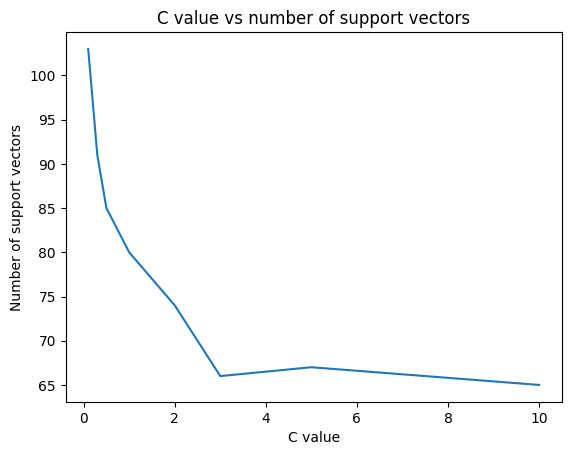

In [32]:
import matplotlib.pyplot as plt

def plot_support_vectors(params):
    num_support_vectors = []

    for c in params:
        # Create a SVM classifier with a linear kernel
        clf = svm.SVC(kernel='linear', C=c)

        # Train the classifier with your data
        clf.fit(X_train, y_train)

        # Get the number of support vectors
        num = len(clf.support_vectors_)

        # Append the number to the list
        num_support_vectors.append(num)

    # Plot C values vs number of support vectors
    plt.plot(params, num_support_vectors)
    plt.xlabel('C value')
    plt.ylabel('Number of support vectors')
    plt.title('C value vs number of support vectors')
    plt.show()

C = [0.1,0.2,0.3,0.5,1,2,3,5,10]
plot_support_vectors(C)


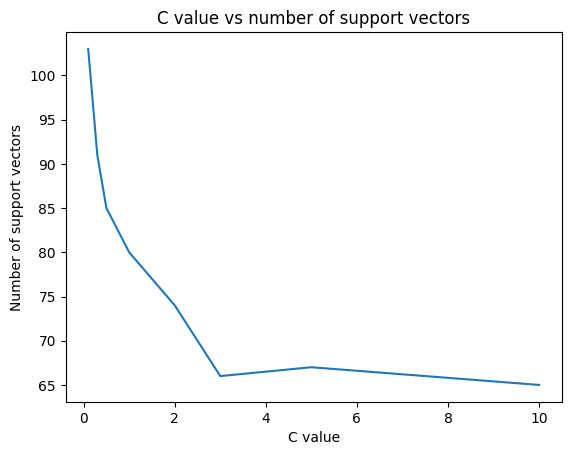

In [33]:
C = [0.1,0.2,0.3,0.5,1,2,3,5,10]
plot_support_vectors(C)

**Now that you have a plot, go back to the questions and explain more using the context of the data. If you were wrong, explain your misconception.**

## 4) Hyperparam Tuning

Compare  the  performance  of  four  different  kernel  functions:  linear (`linear`), polynomial (`poly`),  radial basis function (`rbf`), and `sigmoid`. Not only will you be changing the kernel function, you'll also be optimizing for the different hyperparams.

For each type of kernel functions, train your SVM classifiers using the training data and evaluate the resulting SVM classifer using testing data using accuracy, precision, recall and f-measure of the corresponding classification results.

### 4.1 Basic Hyperparameters (Group)

Write a function called `best_hyperparams` that when given a dictionary of params, runs a `GridSearchCV` on an SVC model using the training and test data.

Use a `cv` of 5.

This function will return the optimized classifier `clf`, and the set of best params (using `clf.best_params_`).

See the documentation for [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more info.

In [ ]:
"""
Input:
    params_set: A dictionary of params to use for the grid search
Output:
    The classifier with the best hyperparams
    The dict of best params itself

Function:
    use gridsearch to find the best SVC classifier
    return the best parameters
"""

def best_hyperparams(param_set):
    return None

In [37]:
# Here are the value ranges for each of the params.
# We will tell you which of these to tune for which kernel.

# C is the regularization paramater we've discussed before
C = [0.1,0.2,0.3,0.5,1,2,3,5,10]

# degree is the degree of the polynomial used for the polynomial kernel
degree = [1,2,3,4,5]

# coef is the independent term in the kernel function, and is ony used by poly and sigmoid
coef0 = [0.0001,0.001,0.002,0.01,0.02,0.1,0.2,0.3,1,2,5,10]

# gamma is the kernel coefficent used for rbf, poly, and sigmoid
gamma = [0.0001,0.001,0.002,0.01,0.02,0.1,0.2,0.3,1,2,3]

In [40]:
from sklearn.metrics import classification_report

In [42]:
# params = [{
#     "kernel":["poly"],
#     "C":C,
#     "degree":degree,
#     "coef0":coef0
# }]

# params, model = best_hyperparams(params)
# print(params)
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions))
# params = [{
#     "kernel":["rbf"],
#     "C":C,
#     "gamma":gamma
# }]

# params, model = best_hyperparams(params)
# print(params)
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions))
# params = [{
#     "kernel":["sigmoid"],
#     "C":C,
#     "coef0":coef0,
#     "gamma":gamma
# }]

# params, model = best_hyperparams(params)
# print(params)
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions))

### Linear Kernel (Follow)
For the **linear** kernel, tune `C`.

In [43]:
# params = [{
#     "kernel":["linear"],
#     "C":C
# }]

# params, model = best_hyperparams(params)
# print(params)
# predictions = model.predict(X_test)
print(classification_report(predictions,y_test))

NameError: ignored

### Poly Kernel (Group)
For the **polynomial** kernel, tune `C`, `degree` and `coef0`.

### RBF Kernel (Group)
For the **rbf** kernel, tune `C` and `gamma`.

### Sigmoid Kernel (Group)

For the **sigmoid** kernel, tune `C`, `coef0`, and `gamma`.

### Results

Consider the following visualizaion of how SVM predicts with different kernels on different datasets:

![Different Kernels](https://i.imgur.com/HKTLn35.png)

Given your results, answer the following questions:

1. Which kernel performed best?
2. What criteria are you using to define the best model?
3. Based on the best-performing model(s), what properties do you think the data have (e.g. is close to linearly separable)?

**Answer here**
1.
2.
3.